In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cufflinks as cf

import plotly.graph_objects as go
from plotly.subplots import make_subplots 

from plotly.offline import init_notebook_mode, download_plotlyjs, plot, iplot
import plotly.express as px

%matplotlib inline
cf.go_offline()

init_notebook_mode(connected = True)

In [2]:
pl15 = pd.read_csv('pl_15-16.csv')
pl16 = pd.read_csv('pl_16-17.csv')
pl17 = pd.read_csv('pl_17-18.csv')
pl18 = pd.read_csv('pl_18-19.csv')
pl19 = pd.read_csv('pl_19-20.csv')
pl20 = pd.read_csv('pl_20-21.csv')

pl15['Year'] = "2015/2016"
pl16['Year'] = "2016/2017"
pl17['Year'] = "2017/2018"
pl18['Year'] = "2018/2019"
pl19['Year'] = "2019/2020"
pl20['Year'] = "2020/2021"

In [3]:
pl_15to20 = pd.concat([pl15, pl16, pl17, pl18, pl19, pl20])

In [4]:
pl_15to20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 861
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5109 non-null   int64  
 1   Name                    5109 non-null   object 
 2   Position                5109 non-null   object 
 3   Appearances             5109 non-null   int64  
 4   Clean sheets            2204 non-null   float64
 5   Goals conceded          1824 non-null   float64
 6   Tackles                 4525 non-null   float64
 7   Tackle success %        3464 non-null   object 
 8   Last man tackles        1620 non-null   float64
 9   Blocked shots           4525 non-null   float64
 10  Interceptions           4525 non-null   float64
 11  Clearances              4525 non-null   float64
 12  Headed Clearance        4525 non-null   float64
 13  Clearances off line     1620 non-null   float64
 14  Recoveries              3464 non-null   f

In [ ]:
pl15.head()

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Big chances missed,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Year
0,0,Rolando Aarons,Midfielder,10,NaN,NaN,13.0,77%,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016
1,1,Almen Abdi,Midfielder,32,NaN,NaN,83.0,78%,NaN,10.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016
2,2,Abdul Rahman Baba,Defender,15,2.0,13.0,47.0,83%,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016
3,3,Mehdi Abeid,Midfielder,0,NaN,NaN,0.0,0%,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016
4,4,Tammy Abraham,Forward,2,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016


In [ ]:
pl_15to20.head()

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Year,Goals Conceded,Big Chances Created,Penalties Saved
0,0,Rolando Aarons,Midfielder,10,NaN,NaN,13.0,77%,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016,NaN,NaN,NaN
1,1,Almen Abdi,Midfielder,32,NaN,NaN,83.0,78%,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016,NaN,NaN,NaN
2,2,Abdul Rahman Baba,Defender,15,2.0,13.0,47.0,83%,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016,NaN,NaN,NaN
3,3,Mehdi Abeid,Midfielder,0,NaN,NaN,0.0,0%,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016,NaN,NaN,NaN
4,4,Tammy Abraham,Forward,2,NaN,NaN,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015/2016,NaN,NaN,NaN


<h1>Leicester City, Season 2015-2016</h1>

The Premier League is one of the world's most entertaining leagues. They have some of the best managers, players and fans! But, what makes it truly entertaining is the sheer unpredictability. There are 6 equally amazing teams with a different team lifting the trophy every season. Not only that, the league has also witnessed victories from outside teams of the top 6. So, let us analyze some of these instances.

Leicester City ended up winning the title in the 2015/16 season when literally nobody expected to see it. The odds of them winning the title at the start of the 2015/16 was 5000/1! 

However, it happened. Let us look at some of the numbers and assess how they managed this feat.
    
<center><img src="leicester.jpg" style="vertical-align: center" width ="500" height=500 ></center>

<AxesSubplot:title={'center':'Top 5 Goal Scorers 2015-2016'}, xlabel='Name'>

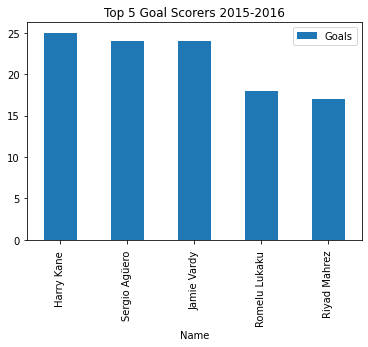

In [7]:
#Removing the players that didn't have a single match in this season and then finding top 5 goalsoccers

pl15 = pl15[pl15['Appearances']!=0]

pl15_goalscorer = pl15.nlargest(5, ['Goals'])
pl15_goalscorer.plot(kind = 'bar', x='Name', y='Goals', title='Top 5 Goal Scorers 2015-2016')

<AxesSubplot:title={'center':'Top 5 Playmakers 2015-2016'}, xlabel='Name'>

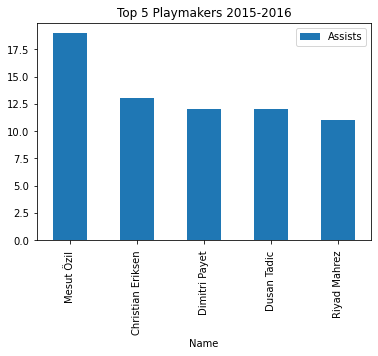

In [8]:
pl15_playmakers = pl15.nlargest(5, ['Assists'])

pl15_playmakers.plot(kind='bar', x='Name', y='Assists', title='Top 5 Playmakers 2015-2016')

**Riyad Mahrez** appeared not only in Top 5 Scorers but also in Top 5 playmakers, he was the key player for the magic championship of *Leicester City* in season 2015-2016. For the bigger picture, let's take a look at goal involvements (goals + assists)

<AxesSubplot:title={'center':'Top 5 Player Had Most Involvements 2015-2016'}, xlabel='Name'>

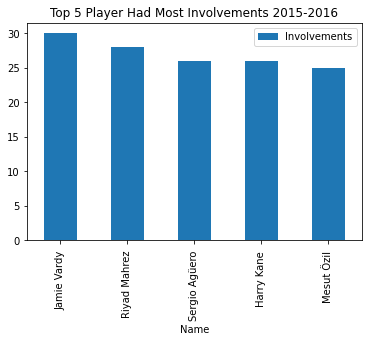

In [9]:
#Creating 'Involvemnts' coloumn for season 15-16
pl15['Involvements'] = pl15['Goals'] + pl15['Assists']

pl15_top_involvements = pl15.nlargest(5, 'Involvements')
pl15_top_involvements.plot(kind='bar', x='Name', y='Involvements', title='Top 5 Player Had Most Involvements 2015-2016')

<center><img src="vardymahrez.jpg" style="vertical-align: center" width ="500" height=500 ></center>

**Jamie Vardy** with 30 goal involvements followed by **Riyad Mahrez** with 28. This reveals a major reason why *Leicester City* won the Premier League.

But, scoring goals was not enough for winning the title. Let us check some statistics of another best player of *Leicester City* - **N'Golo Kante**

In [10]:
#Selecting Midfielder season 15-16
midfielder15 = pl15[pl15['Position']=='Midfielder']

interceptions = midfielder15.nlargest(10, 'Interceptions')[['Name','Interceptions']]
tackles = midfielder15.nlargest(10, 'Tackles')[['Name','Tackles']]
duels_won = midfielder15.nlargest(10, 'Duels won')[['Name','Duels won']]

for i in [interceptions, tackles, duels_won]:
    print(i, "\n")


                Name  Interceptions
367    N'Golo Kanté           156.0
285   Idrissa Gueye           141.0
108    Yohan Cabaye           120.0
746   Claudio Yacob           118.0
662   Andrew Surman           109.0
422     Yann M'Vila            86.0
154       Jack Cork            83.0
498      Mark Noble            83.0
115  Etienne Capoue            82.0
191       Eric Dier            80.0 

                   Name  Tackles
367       N'Golo Kanté     175.0
285      Idrissa Gueye     144.0
418        Lucas Leiva     108.0
746      Claudio Yacob     108.0
108       Yohan Cabaye     107.0
206  Daniel Drinkwater     106.0
231        Fernandinho     105.0
184      Mousa Dembélé     104.0
223      Cesc Fàbregas     103.0
498         Mark Noble     103.0 

                  Name  Duels won
285     Idrissa Gueye       295.0
367      N'Golo Kanté       277.0
56       Ross Barkley       250.0
184     Mousa Dembélé       249.0
388  Cheikhou Kouyaté       248.0
115    Etienne Capoue       235.0

As we can see from the above output, Kante is
    
    #1 in the league for Interceptions
    #1 in the league for Tackles
    #2 in the league for Duels Won
    
Those are some incredible numbers from the defensive midfielder. His contribution is very clear from this.

<center><img src="kante.png" style="vertical-align: center" width ="500" height=500 ></center>

While we could just look at Clean Sheets, it may not tell us the whole story. While it's true that more Clean Sheets mean a strong defensive performance, but it doesn't give you details about how many goals were conceded in the other games. More goals conceded in one game reflects on a poor defense. 

Therefore, a stat about "number of goals conceded per game" will tell the whole story. But it is important to make sure that the defender has enough appearances. For instance, a defender with only 1 appearance and got 0 goal conceded will have a great "goals conceded per game" stat. However, this player didn't play enough game to be considered.

<AxesSubplot:title={'center':'Top Least Goals Conceded Per Game'}, xlabel='Name'>

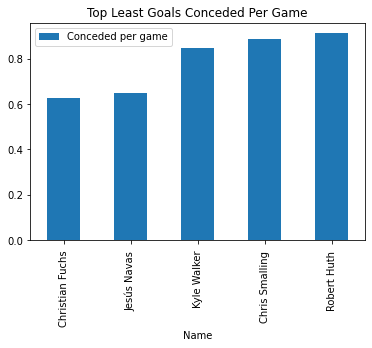

In [11]:
#Selecting defenders of season 2015-2016
pl15_defenders = pl15[pl15['Position']=='Defender']

#Selecting defenders that play greater than or equal to 30 match and making a new column 'Conceded per game'(goals conceded/appearances)
top_def_stats = pl15_defenders[pl15_defenders['Appearances']>=30]

top_def_stats['Conceded per game'] = top_def_stats['Goals conceded']/top_def_stats['Appearances']
least_conceded = top_def_stats.nsmallest(5, 'Conceded per game')

least_conceded.plot(kind='bar', x='Name', y='Conceded per game', title='Top Least Goals Conceded Per Game')

<center><img src="fuchhuth.jpg" style="vertical-align: center" width ="500" height=500 ></center>

We clearly see that **Christian Fuchs** and **Robert Hutch** named in the list of top 5 defenders that have the least goals conceded per games at 0,6 and approximate 0.9 respectively. They both came from *Leicester City* which is the championship of this season.

Now, let's briefly look at *Leicester City*'s goalkeeper - Kasper Schmeichel who were also the captain of the team.

In [12]:
pl15_goalkeepers = pl15[pl15['Position']=='Goalkeeper']

pl15_goalkeepers[pl15_goalkeepers ['Name']=='Kasper Schmeichel ']

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Year,Involvements
614,614,Kasper Schmeichel,Goalkeeper,38,15.0,36.0,NaN,NaN,NaN,NaN,...,99.0,0.0,22.0,47.0,15.0,46.0,82.0,324.0,2015/2016,0


We can see that he had 38 appearances. Let's compare him with other goalkeepers having similar appearances.

In [13]:
pl15_goalkeepers = pl15_goalkeepers[pl15_goalkeepers['Appearances']>=36]

pl15_goalkeepers[['Name','Appearances','Clean sheets', 'Goals conceded','Saves']]

,Name,Appearances,Clean sheets,Goals conceded,Saves
222,Lukasz Fabianski,37,9.0,51.0,115.0
302,Heurelho Gomes,38,11.0,49.0,121.0
413,Hugo Lloris,37,13.0,34.0,88.0
614,Kasper Schmeichel,38,15.0,36.0,99.0


Although **Hugo Lloris** had 2 fewer clean sheets and 2 goals conceded, he played one less appeareance than **Kasper Schmeichel**

Therefore, we can conclude that Manager **Claudio Ranieri** , with his incredibly balanced and consistent squad lead *Leicester City* to the EPL Championship for the first time.

<center><img src="kasper.jpg" style="vertical-align: center" width ="500" height=500 ></center>

<h1>Liverpool's road to become champion!</h1>

In the 2019-2020 season, *Liverpool* won the championship after 30 years of waiting. To get this championship, great merit belongs to the coach, the attacking trio and 2 valuable contracts.
<center><img src="liver.png" style="vertical-align: center" width ="500" height=500 ></center>



<h1>Amazing 3: Salah, Mane, Firmino</h1>

<center><img src="trio.jpg" style="vertical-align: center" width ="500" height=500 ></center>

In [14]:
salah17 = pl17[pl17['Name']=='Mohamed Salah ']
firmino17 = pl17[pl17['Name']=='Roberto Firmino ']
mane17 = pl17[pl17['Name']=='Sadio Mané ']

liver_trios17 = pd.concat([salah17, mane17, firmino17])

#################################################################

salah18 = pl18[pl18['Name']=='Mohamed Salah ']
firmino18 = pl18[pl18['Name']=='Roberto Firmino ']
mane18 = pl18[pl18['Name']=='Sadio Mané ']

liver_trios18 = pd.concat([salah18, mane18, firmino18])

#################################################################

salah19 = pl19[pl19['Name']=='Mohamed Salah ']
firmino19 = pl19[pl19['Name']=='Roberto Firmino ']
mane19 = pl19[pl19['Name']=='Sadio Mané ']

liver_trios19 = pd.concat([salah19, mane19, firmino19])


	2017-2018

                 Name  Goals
504    Mohamed Salah      32
452       Sadio Mané      10
623  Roberto Firmino      15

		  Total = 57

-----------------------------------------------------------

	2018-2019

                 Name  Goals
566    Mohamed Salah      22
509       Sadio Mané      22
690  Roberto Firmino      12

		  Total = 56

-----------------------------------------------------------

	2019-2020

                 Name  Goals
623    Mohamed Salah      19
560       Sadio Mané      18
758  Roberto Firmino       9

		  Total = 46

-----------------------------------------------------------


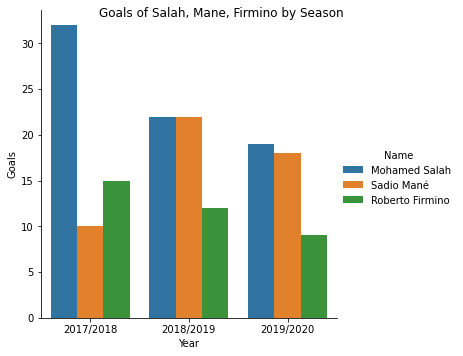

In [15]:
liver_trios = pd.concat([liver_trios17, liver_trios18, liver_trios19])

liver_plot = sb.catplot(x='Year', y='Goals', hue='Name', kind='bar' ,data=liver_trios)
liver_plot.fig.suptitle('Goals of Salah, Mane, Firmino by Season')

year1 = 2017
year2 = 2018

for i in [liver_trios17, liver_trios18, liver_trios19]:
    print("\n\t{}-{}\n\n{}\n\n\t\t  Total = {}".format(year1, year2, i[['Name', 'Goals']], i['Goals'].sum()))
    print("\n-----------------------------------------------------------")
    year1+=1
    year2+=1
    
print(liver_plot)

We can see that there is a decline trend in the number of goals scored. They fell from 57 goals to 46 goals, but the team jumped 3 positions in period to win the title.
<br>

This is said to be because of the balanced tatic *Liverpool* chose to adopt after season 2017-2018.
<br>

<h1>Defensive Strength</h1>

*Liverpool* signed **Virgil Van Dijk** in a winter transfer of 2018 for 75 million pounds which made him become the most expensive defender in the world at that time. A large part of *Liverpool*'s recent success has been linked to his transfer as he is said to have dramatically changed *Liverpool*'s defense. 

Along with him, *Liverpool* bought a goalkeeper from *AS Roma* - **Alisson Becker** - who finally put an end to the goalkeeping problem that *Liverpool* had for many years. Let's take a look at some of stat about their performances.

*Liverpool*'s Goalkeepers:<br>
2016-2017: **Simon Mignolet**, **Loris Karius**<br>
2017-2018: **Simon Mignolet**, **Loris Karius**<br>
2018-2019: **Alisson Becker**<br>
2019-2020: **Alisson Becker**, **Adrian**<br>

<center><img src="karius.png" style="vertical-align: center" width ="500" height=500 ></center>

In [18]:
mignolet16 = pl16[pl16['Name']=='Simon Mignolet ']
karius16 = pl16[pl16['Name']=='Loris Karius ']

sum_clean16 = 0
sum_conceded16 = 0

print("\t\t2016-2017 Goalkeeping Stats")
for i in [mignolet16, karius16]:
    print("{}\n".format(i[['Name', 'Appearances', 'Clean sheets', 'Goals conceded']]))
    sum_clean16 += i['Clean sheets'].item()
    sum_conceded16 += i['Goals conceded'].item()

print("\nTotal Clean Sheets = {}\nTotal Goals Conceded = {}".format(sum_clean16, sum_conceded16))
print("\n------------------------------------------------------------------------------\n")
#################################################################

mignolet17 = pl17[pl17['Name']=='Simon Mignolet ']
karius17 = pl17[pl17['Name']=='Loris Karius ']

sum_clean17 = 0
sum_conceded17 = 0

print("\t\t2017-2018 Goalkeeping Stats")
for i in [mignolet17, karius17]:
    print("{}\n".format(i[['Name', 'Appearances', 'Clean sheets', 'Goals conceded']]))
    sum_clean17 += i['Clean sheets'].item()
    sum_conceded17 += i['Goals conceded'].item()

print("\nTotal Clean Sheets = {}\nTotal Goals Conceded = {}".format(sum_clean17, sum_conceded17))
print("\n------------------------------------------------------------------------------\n")
#################################################################

print("\t\t2018-2019 Goalkeeping Stats")
alisson18 = pl18[pl18['Name']=='Alisson ']
for i in [alisson18]:
    print("{}".format(i[['Name', 'Appearances', 'Clean sheets', 'Goals conceded']]))
print("\n------------------------------------------------------------------------------\n")
#################################################################

alisson19 = pl19[pl19['Name']=='Alisson ']
adrian19 = pl19[pl19['Name']=='Adrián ']

sum_clean19 = 0
sum_conceded19 = 0

print("\t\t2019-2020 Goalkeeping Stats")
for i in [alisson19, adrian19]:
    print("{}\n".format(i[['Name', 'Appearances', 'Clean sheets', 'Goals conceded']]))
    sum_clean19 += i['Clean sheets'].item()
    sum_conceded19 += i['Goals conceded'].item()

print("\nTotal Clean Sheets = {}\nTotal Goals Conceded = {}".format(sum_clean19, sum_conceded19))

		2016-2017 Goalkeeping Stats
                Name  Appearances  Clean sheets  Goals conceded
531  Simon Mignolet            28           9.0            30.0

              Name  Appearances  Clean sheets  Goals conceded
413  Loris Karius            10           3.0            12.0


Total Clean Sheets = 12.0
Total Goals Conceded = 42.0

------------------------------------------------------------------------------

		2017-2018 Goalkeeping Stats
                Name  Appearances  Clean sheets  Goals conceded
493  Simon Mignolet            19           7.0            24.0

              Name  Appearances  Clean sheets  Goals conceded
374  Loris Karius            19          10.0            14.0


Total Clean Sheets = 17.0
Total Goals Conceded = 38.0

------------------------------------------------------------------------------

		2018-2019 Goalkeeping Stats
        Name  Appearances  Clean sheets  Goals conceded
17  Alisson            38          21.0            22.0

-----------------

<AxesSubplot:title={'center':'Total Goals Conceded of Liverpool by Season'}, xlabel='Year'>

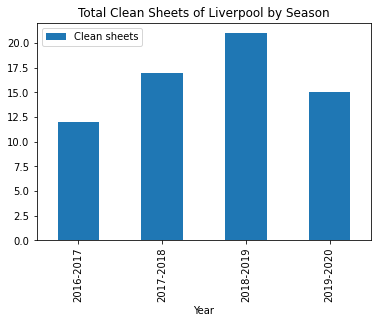

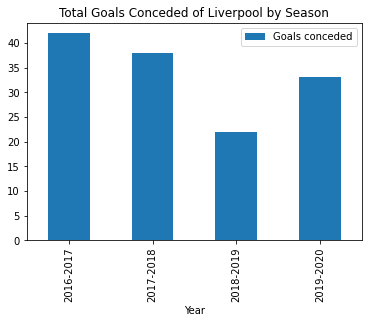

In [17]:
goalkeeping_stats = pd.DataFrame({"Clean sheets": [sum_clean16, sum_clean17, alisson18['Clean sheets'].sum(), sum_clean19],
                                 "Goals conceded": [sum_conceded16, sum_conceded17, alisson18['Goals conceded'].sum(), sum_conceded19],
                                 "Year": ["2016-2017", "2017-2018", "2018-2019", "2019-2020"]})

goalkeeping_stats.plot(kind='bar', x='Year', y='Clean sheets', title = "Total Clean Sheets of Liverpool by Season")
goalkeeping_stats.plot(kind='bar', x='Year', y='Goals conceded', title = "Total Goals Conceded of Liverpool by Season")

2 plots above tell us how **Alisson**'s impact in *Liverpool*'s defense. In his first season at *Liverpool*, he ended up with 21 clean sheets and got only 22 goals conceded. That's why he won the Golden Glove this season.
<center><img src="alisson.jpg" style="vertical-align: center" width ="500" height=500 ></center>

In [24]:
defenders = pl_15to20[pl_15to20['Position']=='Defender']

van_dijk = defenders[defenders['Name']=='Virgil van Dijk ']
van_dijk[['Name', 'Year', 'Appearances', 'Clean sheets', 'Goals conceded', 'Tackle success %', 'Clearances', 'Headed Clearance',
            'Goals', 'Assists', 'Passes per match', 'Duels won', 'Interceptions']]

,Name,Year,Appearances,Clean sheets,Goals conceded,Tackle success %,Clearances,Headed Clearance,Goals,Assists,Passes per match,Duels won,Interceptions
701,Virgil van Dijk,2015/2016,34,10.0,36.0,75%,260.0,152.0,3,0,40.82,249.0,96.0
775,Virgil van Dijk,2016/2017,21,7.0,23.0,77%,142.0,85.0,1,0,46.67,159.0,54.0
731,Virgil van Dijk,2017/2018,26,8.0,28.0,60%,157.0,96.0,0,0,68.08,188.0,47.0
820,Virgil van Dijk,2018/2019,38,20.0,22.0,74%,199.0,112.0,4,2,79.92,244.0,40.0
904,Virgil van Dijk,2019/2020,38,15.0,33.0,52%,162.0,83.0,5,1,85.76,239.0,40.0
798,Virgil van Dijk,2020/2021,5,1.0,NaN,67%,8.0,2.0,1,0,68.20,17.0,5.0


**Van Dijk**'s attacking, passing, goalscoring dramatically improved after joining *Liverpool* in 2018. However, it didn't affect his defensive skills. Beside his appearance in the second half of season 2017-2018, the goalkeeper in this half was **Loris Karius** who conceded 10 goals fewer and had 3 more clean sheets than his goalkeeping counterpart **Simon Mignolet**.

In season 2020-2021, he got a serious injury and had to miss the whole season.

<center><img src="vandijk.jpg" style="vertical-align: center" width ="500" height=500 ></center>

In [25]:
for i in [mignolet17, karius17]:
    print("{}\n".format(i[['Name', 'Appearances', 'Clean sheets', 'Goals conceded']]))

                Name  Appearances  Clean sheets  Goals conceded
493  Simon Mignolet            19           7.0            24.0

              Name  Appearances  Clean sheets  Goals conceded
374  Loris Karius            19          10.0            14.0



<h1>Conclusion</h1>

*Leicester City* and *Liverpool* won the league seem very astonishing, but analysis of individual player performances make the story scene. While *Leicester City* had outstanding players in every positions and their stats were significantly higher than the rest, *Liverpool* changed in attacking tatics and their new signings **Virgil van Dijk** and **Alisson Becker** slowly turned the tide in their favour.